In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

fig_dir = "../manuscript/figs/"

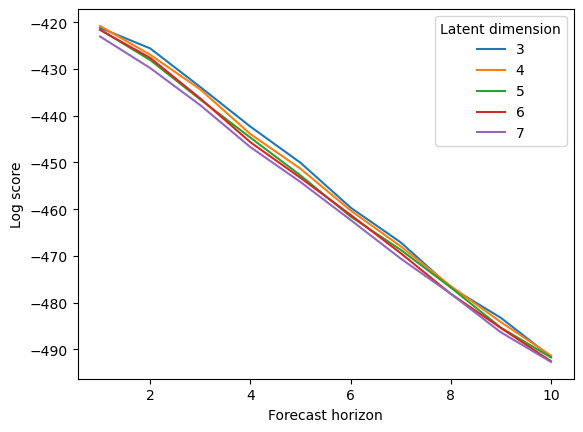

In [3]:
score = pd.read_csv("../trainedModels/results/results-230126.csv")
score = score.loc[score['latent_dim']<8]
score = score.loc[score['latent_dim']>2]
score['latent_dim'] = score['latent_dim'].astype('str')
score['Log score'] = score['Log score']*(-1)
score  = score[['latent_dim','Forecast horizon','Log score']].groupby(['latent_dim','Forecast horizon']).mean()

sns.color_palette("colorblind")

sns.lineplot(x = 'Forecast horizon', y = 'Log score', hue = 'latent_dim', data = score)
plt.legend(title = "Latent dimension")

fig_path = fig_dir + 'latent_dim_comparison.pdf'

plt.savefig(fig_path, bbox_inches = 'tight', dpi = 300)


In [ ]:
score.groupby('latent_dim').mean()

,Log score
latent_dim,
3,-455.137394
4,-455.750177
5,-456.770010
6,-457.118897
7,-458.146153
8,-457.075858
9,-457.338513


In [ ]:
score = pd.read_csv("results-230126.csv", index_col=False)
score = score.loc[score['latent_dim']==3]
score['Log score'] = score['Log score']*(-1)
score  = score[['Forecast horizon','Log score']].groupby(['Forecast horizon'], as_index = False).mean()
score['model'] = 'VI'

In [ ]:

score_other = pd.read_csv("momo/logScoreOtherModels.csv", index_col=False)
score_other = score_other.drop('nn_layers', axis=1)
score_other = score_other.drop('latent_dim', axis=1)

score_other  = score_other[['Forecast horizon','Log score','model']].groupby(['Forecast horizon','model'], as_index = False).mean()

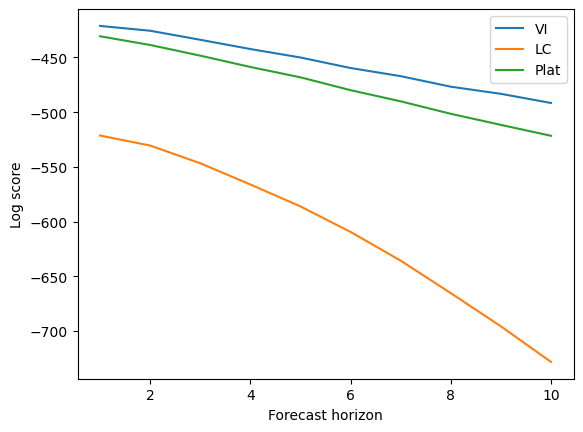

In [ ]:
score_all = pd.concat([score, score_other],ignore_index=True)

sns.color_palette("colorblind")
fig, ax = plt.subplots()

sns.lineplot(x = 'Forecast horizon', y = 'Log score', hue = 'model', data = score_all)
fig_path = fig_dir + 'model_comparison.pdf'
ax.legend().set_title('')

plt.savefig(fig_path, bbox_inches = 'tight', dpi = 300)

In [ ]:
score_all.groupby('model').mean()

,Forecast horizon,Log score
model,,
LC,5.5,-608.482678
Plat,5.5,-474.918951
VI,5.5,-455.137394
